In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [6]:
# Zahin's File Reader

In [7]:
# Rishi's File Reader
from google.colab import drive

drive.mount('/content/drive')
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/diabetes.csv')

Mounted at /content/drive


In [8]:
# Visulize data
print(dataset.head)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

In [9]:
# Normalizing the input features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [10]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [11]:
# Building the ANN model
def create_model(optimizer='adam', neurons=12):
    model = Sequential()
    model.add(Dense(neurons, input_dim=8, activation='relu'))
    model.add(Dense(neurons // 2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [12]:
# Wrap the model with KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

<ipython-input-12-d87513676611>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


In [13]:
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'neurons': [8, 12, 16],
    'batch_size': [10, 20, 30],
    'epochs': [50, 100, 150]
}

In [14]:
# Create a RandomizedSearchCV object with the KerasClassifier and parameter grid
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=5, n_jobs=-1, n_iter=10)

# Fit the RandomizedSearchCV object to the training data
random_result = random_search.fit(X_train, y_train)


In [15]:
# Print the best hyperparameters
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))


Best: 0.765507 using {'optimizer': 'rmsprop', 'neurons': 16, 'epochs': 50, 'batch_size': 10}


In [16]:
# Train and evaluate the model with the best hyperparameters
best_params = random_result.best_params_
best_model = create_model(best_params['optimizer'], best_params['neurons'])
best_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'])


Epoch 1/50
62/62 [==============================] - 1s 3ms/step - loss: 0.7098 - accuracy: 0.5016
Epoch 2/50
62/62 [==============================] - 0s 3ms/step - loss: 0.6007 - accuracy: 0.6678
Epoch 3/50
62/62 [==============================] - 0s 3ms/step - loss: 0.5593 - accuracy: 0.7134
Epoch 4/50
62/62 [==============================] - 0s 3ms/step - loss: 0.5344 - accuracy: 0.7362
Epoch 5/50
62/62 [==============================] - 0s 3ms/step - loss: 0.5183 - accuracy: 0.7443
Epoch 6/50
62/62 [==============================] - 0s 3ms/step - loss: 0.5059 - accuracy: 0.7606
Epoch 7/50
62/62 [==============================] - 0s 3ms/step - loss: 0.4980 - accuracy: 0.7541
Epoch 8/50
62/62 [==============================] - 0s 4ms/step - loss: 0.4913 - accuracy: 0.7573
Epoch 9/50
62/62 [==============================] - 0s 4ms/step - loss: 0.4863 - accuracy: 0.7606
Epoch 10/50
62/62 [==============================] - 0s 3ms/step - loss: 0.4816 - accuracy: 0.7704
Epoch 11/50
62/62 [

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                144       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________
None


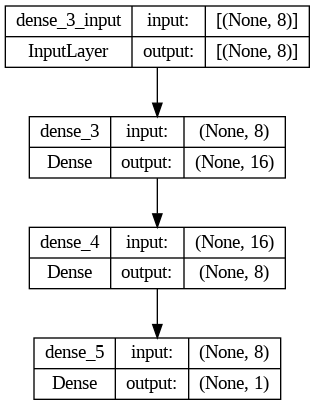

In [17]:
# Print the model summary
print(best_model.summary())

# Plot the model architecture
from keras.utils.vis_utils import plot_model
plot_model(best_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [18]:
_, accuracy = best_model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy * 100))


5/5 [==============================] - 0s 3ms/step - loss: 0.4665 - accuracy: 0.7922
Accuracy: 79.22


In [19]:
# Make predictions and calculate evaluation metrics
y_pred = best_model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

5/5 [==============================] - 0s 2ms/step


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
confusion = confusion_matrix(y_test, y_pred_classes)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Confusion matrix:', confusion.ravel())


Accuracy: 0.7922077922077922
Precision: 0.6470588235294118
Recall: 0.7021276595744681
F1-score: 0.673469387755102
Confusion matrix: [89 18 14 33]


In [21]:
# Calculate sensitivity and specificity
TN, FP, FN, TP = confusion.ravel()
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print('Sensitivity:', sensitivity)
print('Specificity:', specificity)


Sensitivity: 0.7021276595744681
Specificity: 0.8317757009345794


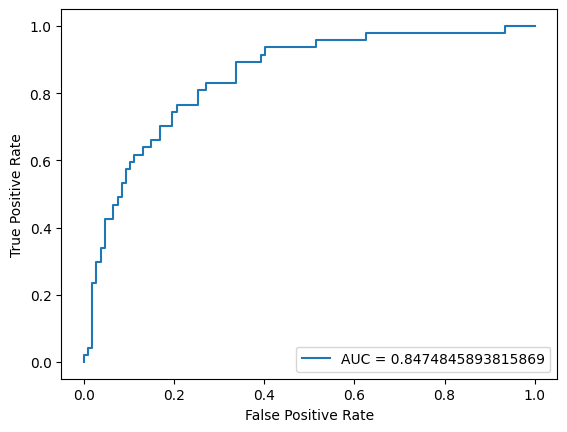

In [22]:
# Calculate and plot the ROC curve
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="AUC = " + str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [23]:
from sklearn.tree import DecisionTreeClassifier

# Train the decision tree
dt_classifier = DecisionTreeClassifier(random_state=0)
dt_classifier.fit(X_train, y_train)

# Make predictions using the decision tree
y_pred_dt = dt_classifier.predict(X_test)

# Compute the evaluation metrics for the decision tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
confusion_dt = confusion_matrix(y_test, y_pred_dt)

print('Decision Tree Confusion Matrix:\n', confusion_dt)
print('Decision Tree Accuracy:', accuracy_dt)
print('Decision Tree Precision:', precision_dt)
print('Decision Tree Recall or Sensitivity:', recall_dt)
print('Decision Tree F1-score:', f1_dt)
print('Decision Tree Confusion matrix:', confusion_dt.ravel())
tn_dt, fp_dt, fn_dt, tp_dt = confusion_dt.ravel()
specificity_dt = tn_dt / (tn_dt + fp_dt)

print('Decision Tree Specificity:', specificity_dt)


Decision Tree Confusion Matrix:
 [[86 21]
 [16 31]]
Decision Tree Accuracy: 0.7597402597402597
Decision Tree Precision: 0.5961538461538461
Decision Tree Recall or Sensitivity: 0.6595744680851063
Decision Tree F1-score: 0.6262626262626262
Decision Tree Confusion matrix: [86 21 16 31]
Decision Tree Specificity: 0.8037383177570093


In [24]:
from sklearn.linear_model import LogisticRegression

# Train the logistic regression model
lr_classifier = LogisticRegression(random_state=0)
lr_classifier.fit(X_train, y_train)

# Make predictions using the logistic regression model
y_pred_lr = lr_classifier.predict(X_test)

# Compute the evaluation metrics for logistic regression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
confusion_lr = confusion_matrix(y_test, y_pred_lr)

# Compute specificity for logistic regression
tn_lr, fp_lr, fn_lr, tp_lr = confusion_lr.ravel()
specificity_lr = tn_lr / (tn_lr + fp_lr)

# Print evaluation metrics for logistic regression
print('Logistic Regression Accuracy:', accuracy_lr)
print('Logistic Regression Precision:', precision_lr)
print('Logistic Regression Recall or Sensitivity:', recall_lr)
print('Logistic Regression F1-score:', f1_lr)
print('Logistic Regression Specificity:', specificity_lr)
print('Logistic Regression Confusion Matrix:\n', confusion_lr)

Logistic Regression Accuracy: 0.8246753246753247
Logistic Regression Precision: 0.7631578947368421
Logistic Regression Recall or Sensitivity: 0.6170212765957447
Logistic Regression F1-score: 0.6823529411764706
Logistic Regression Specificity: 0.9158878504672897
Logistic Regression Confusion Matrix:
 [[98  9]
 [18 29]]


In [25]:
from sklearn.neighbors import KNeighborsClassifier


# Train the kNN model
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)



# Make predictions using the kNN
y_pred_knn = knn_classifier.predict(X_test)


# Compute the evaluation metrics for kNN
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
confusion_knn = confusion_matrix(y_test, y_pred_knn)



# Compute specificity for kNN
tn_knn, fp_knn, fn_knn, tp_knn = confusion_knn.ravel()
specificity_knn = tn_knn / (tn_knn + fp_knn)



# Print evaluation metrics for kNN
print('kNN Accuracy:', accuracy_knn)
print('kNN Precision:', precision_knn)
print('kNN Recall or Sensitivity:', recall_knn)
print('kNN F1-score:', f1_knn)
print('kNN Specificity:', specificity_knn)
print('kNN Confusion Matrix:\n', confusion_knn)

kNN Accuracy: 0.8051948051948052
kNN Precision: 0.6976744186046512
kNN Recall or Sensitivity: 0.6382978723404256
kNN F1-score: 0.6666666666666666
kNN Specificity: 0.8785046728971962
kNN Confusion Matrix:
 [[94 13]
 [17 30]]


In [26]:
from sklearn.ensemble import RandomForestClassifier
# Train the random forest model
rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier.fit(X_train, y_train)

# Make predictions using the random forest
y_pred_rf = rf_classifier.predict(X_test)

# Compute the evaluation metrics for random forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
confusion_rf = confusion_matrix(y_test, y_pred_rf)

# Compute specificity for random forest
tn_rf, fp_rf, fn_rf, tp_rf = confusion_rf.ravel()
specificity_rf = tn_rf / (tn_rf + fp_rf)

# Print evaluation metrics for random forest
print('Random Forest Accuracy:', accuracy_rf)
print('Random Forest Precision:', precision_rf)
print('Random Forest Recall or Sensitivity:', recall_rf)
print('Random Forest F1-score:', f1_rf)
print('Random Forest Specificity:', specificity_rf)
print('Random Forest Confusion Matrix:\n', confusion_rf)

Random Forest Accuracy: 0.7857142857142857
Random Forest Precision: 0.6590909090909091
Random Forest Recall or Sensitivity: 0.6170212765957447
Random Forest F1-score: 0.6373626373626374
Random Forest Specificity: 0.8598130841121495
Random Forest Confusion Matrix:
 [[92 15]
 [18 29]]
